## **1. NBA PLAYERS** <a id="1"></a>

<a><img style="float: right;" src="https://pbs.twimg.com/media/D_SZjUSWkAENmvg.jpg" width="300" /></a>
 



- Data Source: /kaggle/input/country-code/country_code.csv
             : /kaggle/input/nba-players-data/all_seasons.csv

### 1.2 Notebook Preparation <a id="1.2"></a>

This part of the notebook deals with the relevant library import and visual configuration.

In [12]:
# Import libraries

import pandas as pd
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
# Set notebook options


pd.options.display.max_columns = 30

import warnings
warnings.filterwarnings("ignore")

## **2. Data Preparation** <a id="2"></a>

The below section provides an initial exploration of the data.

In [15]:
# Import the data as a DataFrame and check first 5 rows

df = pd.read_csv('all_seasons.csv', index_col=0)
country_codes = pd.read_csv("country_code.csv", index_col=0)

df.head(5)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [90]:
# Check data types and if any records are missing

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12305 entries, 0 to 12304
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12305 non-null  object 
 1   team_abbreviation  12305 non-null  object 
 2   age                12305 non-null  float64
 3   player_height      12305 non-null  float64
 4   player_weight      12305 non-null  float64
 5   college            12305 non-null  object 
 6   country            12305 non-null  object 
 7   draft_year         12305 non-null  object 
 8   draft_round        12305 non-null  object 
 9   draft_number       12305 non-null  object 
 10  gp                 12305 non-null  int64  
 11  pts                12305 non-null  float64
 12  reb                12305 non-null  float64
 13  ast                12305 non-null  float64
 14  net_rating         12305 non-null  float64
 15  oreb_pct           12305 non-null  float64
 16  dreb_pct           123

In [91]:
# Let us view the statistical information of our the NBA players dataset

df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.00,12305.00,12305.00,12305.00,12305.00,12305.00,12305.00,12305.00,12305.00,12305.00,12305.00,12305.00,12305.00
mean,27.08,200.61,100.37,51.29,8.17,3.56,1.81,-2.26,0.05,0.14,0.18,0.51,0.13
std,4.34,9.15,12.48,25.10,5.97,2.48,1.79,12.67,0.04,0.06,0.05,0.10,0.09
min,18.00,160.02,60.33,1.00,0.00,0.00,0.00,-250.00,0.00,0.00,0.00,0.00,0.00
25%,24.00,193.04,90.72,31.00,3.60,1.80,0.60,-6.40,0.02,0.10,0.15,0.48,0.07
50%,26.00,200.66,99.79,57.00,6.70,3.00,1.20,-1.30,0.04,0.13,0.18,0.52,0.10
75%,30.00,208.28,108.86,73.00,11.50,4.70,2.40,3.20,0.08,0.18,0.22,0.56,0.18
max,44.00,231.14,163.29,85.00,36.10,16.30,11.70,300.00,1.00,1.00,1.00,1.50,1.00


- We can establish here that the average age, average height, and average weight of NBA players based on our data
  records are 27 years, 200.61 cm, and 100.37 kg

## **2. Height and Weight Exploration** <a id="3"></a>

### 2.1 Main Variable Analysis <a id="3.1"></a>

In [92]:
# Calculate heigh and weight averages

main_variables = df.groupby('player_name', as_index=False).agg({'player_height': 'mean', 'player_weight':'mean'})

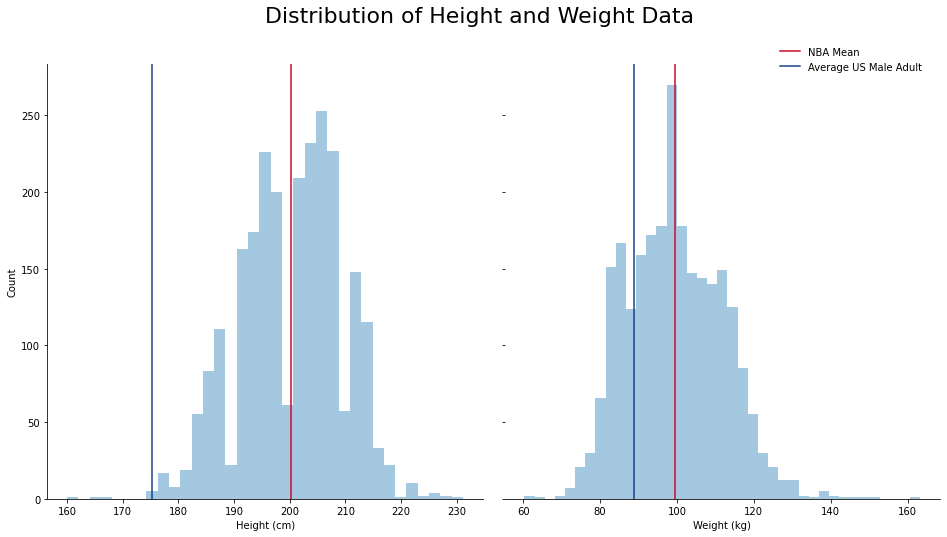

In [93]:
# Visualise distribution of height and weight data
# Source for average US male heigh: https://en.wikipedia.org/wiki/Average_human_height_by_country
# Source for average US male weight:https://en.wikipedia.org/wiki/Human_body_weight

fig, ax = plt.subplots(1,2,figsize=(16, 8),sharey=True)
plt.subplots_adjust(wspace=0.05)

sns.distplot(main_variables ['player_height'], ax=ax[0], label='_nolegend_', kde=False)
sns.distplot(main_variables ['player_weight'], ax=ax[1], label='_nolegend_', kde=False)
ax[0].axvline(main_variables ['player_height'].mean(), color='#c9082a', label='NBA Mean')
ax[1].axvline(main_variables ['player_weight'].mean(), color='#c9082a', label='NBA Mean')

# Add lines for average adults to compare
ax[0].axvline(175.3, color='#17408b', label='Average US Male Adult')
ax[1].axvline(88.8, color='#17408b', label='Average US Male Adult')

ax[0].yaxis.set_label_text('Count')
ax[0].xaxis.set_label_text('Height (cm)')
ax[1].xaxis.set_label_text('Weight (kg)')
plt.suptitle('Distribution of Height and Weight Data', fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.06), frameon=False)
sns.despine(ax=ax[1], left=True)
sns.despine(ax=ax[0])

plt.show()

Both, height and weight, are distributed normally in the NBA. However, it is clear that NBA athletes stand out in terms of their height and weight when compared to regular adult males.

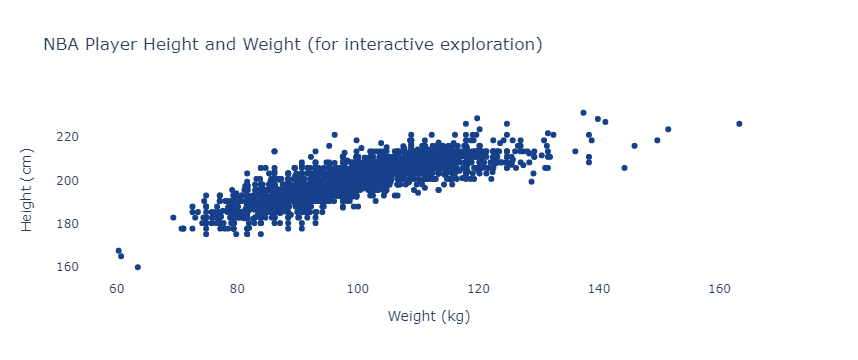

In [94]:
fig = go.Figure(data=go.Scatter(x=main_variables['player_weight'],
                                y=main_variables['player_height'],
                                mode='markers',
                                text=main_variables['player_name'],
                                marker=dict(color='#17408b')
                                ))

fig.update_layout(
    title='NBA Player Height and Weight (for interactive exploration)',
    xaxis_title='Weight (kg)',
    yaxis_title='Height (cm)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

This table utalises Plotly visualisation library. One big advatage of a Plotly table is inherent responsiveness without having to write additional lines of code. This allows to hover over the data points and observe:
* The tallest player ever to step on the NBA floor was Gheorghe Muresan with a hight of 231cm
* The shortest player is Muggsy Bogues standing at 160cm
* Sim Bhullar is by far the heaviest player weighting 163kg (he also made history by [being the first NBA player of Indian descent](https://www.sactownroyalty.com/2020/4/7/21211433/sacramento-kings-history-april-7-sim-bhullar-breaks-a-barrier-first-indian-nba-player))

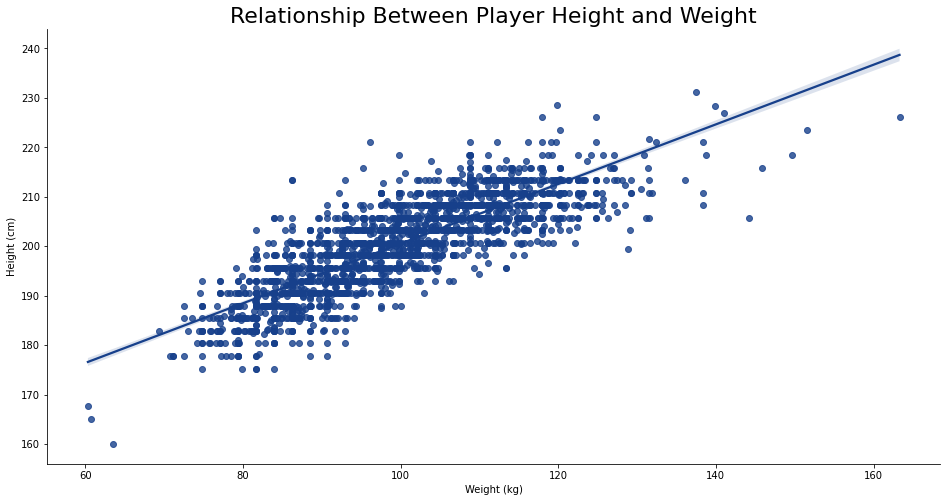

In [95]:
plt.figure(figsize=(16, 8))

sns.regplot(x='player_weight', y='player_height', data=main_variables, color='#17408b')

plt.title('Relationship Between Player Height and Weight', fontsize=22)
plt.ylabel('Height (cm)')
plt.xlabel('Weight (kg)')
sns.despine()

plt.show()

In [96]:
corr = stats.pearsonr(main_variables['player_height'], main_variables['player_weight'])

print(f"Correlation between player height and weight is: {corr[0]}. The statistical significance of this relationship is {corr[1]}")

Correlation between player height and weight is: 0.8210705060051047. The statistical significance of this relationship is 0.0


Not surprisingly, height and weight are two closely related variables.



<a><img style="" src="https://cdn.vox-cdn.com/thumbor/9U7Bn1ajYJ9ySFczKP9bno1HnIw=/0x0:1200x800/1200x800/filters:focal(348x97:540x289)/cdn.vox-cdn.com/uploads/chorus_image/image/60847977/Di9eY4zX0AApYXt.0.jpg"/></a>


## **5. Conclusion** <a id="5"></a>

<a><img style="float: right;" src="https://preview.redd.it/30szuy4xkjhz.jpg?auto=webp&s=012cd6b49ab610c3e37e7f3db9e34cd4f29a988b" width="300" /></a> This notebook provides average Age, Height and Weight of NBA players.

### We can establish here that the average age, average height, and average weight of NBA players based on our data records are 27 years, 200.61 cm, and 100.37 kg